# EDA and Cleaning

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
train = pd.read_csv('../datasets/train.csv', 
                    keep_default_na=False,
                    na_values=[''])
test = pd.read_csv('../datasets/test.csv',
                  keep_default_na=False,
                  na_values=[''])

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
train.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in train.columns]
test.columns = [col.lower().replace(' ', '_').replace('/', '_') for col in test.columns]

In [5]:
train[:1]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500


In [6]:
train.shape

(2051, 81)

SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.


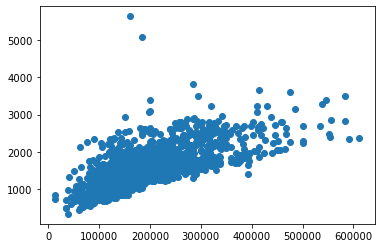

In [7]:
fig, ax = plt.subplots()
ax.scatter(train['saleprice'], train['gr_liv_area'])

##### Remove instances with "Gr Liv Area" greater than 4,000 sq. ft.

In [8]:
train = train[train['gr_liv_area'] < 4000 ]

##### - removed two rows

In [9]:
train.shape

(2049, 81)

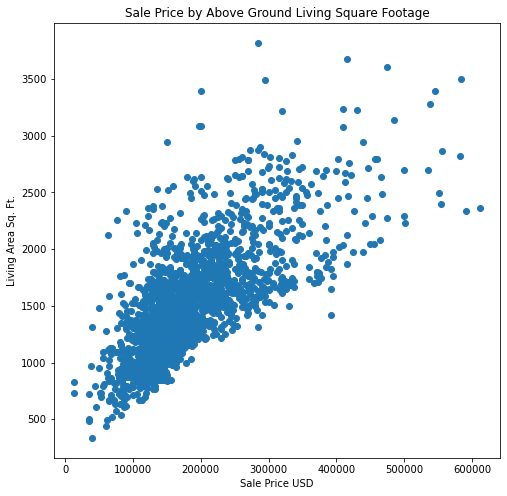

In [57]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(train['saleprice'], train['gr_liv_area'])
plt.title('Sale Price by Above Ground Living Square Footage')
plt.xlabel('Sale Price USD')
plt.ylabel('Living Area Sq. Ft.')
plt.savefig('../images/sq_ft');

## Find Highest Correlations

In [11]:
train.corr()['saleprice'].sort_values(ascending=False).head(20)

saleprice         1.000000
overall_qual      0.803462
gr_liv_area       0.719463
total_bsmt_sf     0.664819
garage_area       0.655483
garage_cars       0.648667
1st_flr_sf        0.648252
year_built        0.572405
year_remod_add    0.550872
full_bath         0.538225
garage_yr_blt     0.534514
mas_vnr_area      0.520023
totrms_abvgrd     0.509775
fireplaces        0.473783
bsmtfin_sf_1      0.445764
lot_frontage      0.355530
open_porch_sf     0.338545
wood_deck_sf      0.327629
lot_area          0.303744
bsmt_full_bath    0.284763
Name: saleprice, dtype: float64

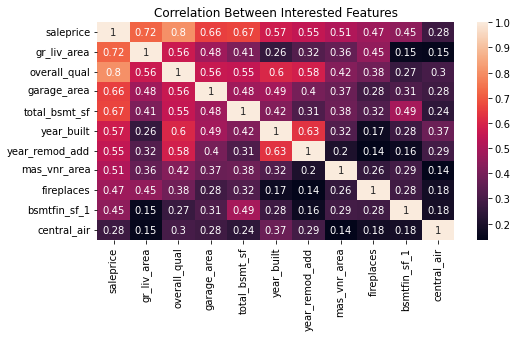

In [66]:
correl = pd.DataFrame(train[['saleprice', 'gr_liv_area', 'overall_qual', 'garage_area',
                            'total_bsmt_sf', 'year_built', 'year_remod_add', 'mas_vnr_area',
                            'fireplaces',  'bsmtfin_sf_1', 'central_air']])
plt.figure(figsize=(8,4))
ax = sns.heatmap(correl.corr(), annot = True)
ax.set_title('Correlation Between Interested Features')
plt.savefig('../images/heatmap');

## Null Values

In [12]:
train.isnull().sum().sort_values(ascending=False).head(20)

lot_frontage      330
garage_yr_blt     114
mas_vnr_type       22
mas_vnr_area       22
bsmt_exposure       4
bsmtfin_type_2      2
bsmt_full_bath      2
bsmt_half_bath      2
garage_cond         1
bsmt_qual           1
garage_finish       1
garage_cars         1
garage_area         1
garage_qual         1
total_bsmt_sf       1
bsmtfin_type_1      1
bsmt_cond           1
bsmtfin_sf_1        1
bsmtfin_sf_2        1
bsmt_unf_sf         1
dtype: int64

#### Lot Frontage: will cleaning the data increase the correlation?


In [13]:
train['lot_frontage'].dtypes

dtype('float64')

In [14]:
train['lot_frontage'].describe()

count    1719.000000
mean       68.878999
std        22.472112
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

<AxesSubplot:xlabel='saleprice', ylabel='lot_frontage'>

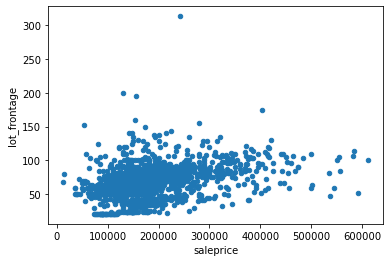

In [15]:
train.plot.scatter('saleprice', 'lot_frontage')

##### Convert Nulls to median

In [16]:
train['lot_frontage'].fillna(value = train['lot_frontage'].median(), inplace = True)
test['lot_frontage'].fillna(value = train['lot_frontage'].median(), inplace = True)

In [17]:
train['lot_frontage'].describe()

count    2049.000000
mean       68.737433
std        20.584676
min        21.000000
25%        60.000000
50%        68.000000
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

##### Remove outlier with lot frontage over 250

In [18]:
train.shape

(2049, 81)

In [19]:
train = train[train['lot_frontage'] < 250]
train.shape

(2048, 81)

In [20]:
train.corr()['saleprice'].sort_values(ascending=False).head(20)

saleprice         1.000000
overall_qual      0.803420
gr_liv_area       0.719370
total_bsmt_sf     0.665519
garage_area       0.655524
garage_cars       0.648663
1st_flr_sf        0.648360
year_built        0.572652
year_remod_add    0.550704
full_bath         0.538092
garage_yr_blt     0.534928
mas_vnr_area      0.520360
totrms_abvgrd     0.509572
fireplaces        0.473658
bsmtfin_sf_1      0.445839
lot_frontage      0.346016
open_porch_sf     0.338903
wood_deck_sf      0.327990
lot_area          0.303320
bsmt_full_bath    0.284477
Name: saleprice, dtype: float64

- Checking to see if lot frontage correlation would improve after converting null values but it did not.

#### Create a function to input a list of attributes to return the number of null values and data types

In [21]:
def null_type(lis):
    return train.isnull().sum()[lis], train.dtypes[lis]

In [22]:
def null_type_test(lis):
    return test.isnull().sum()[lis], test.dtypes[lis]

#### Clean the top correlated numeric attributes, intentionally left out similar features to prevent multicolinearity.

In [23]:
explore = ['saleprice', 'gr_liv_area', 'overall_qual', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'mas_vnr_area', 'fireplaces',  'bsmtfin_sf_1', 'central_air']
explore_test = ['gr_liv_area', 'overall_qual', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'mas_vnr_area', 'fireplaces',  'bsmtfin_sf_1', 'central_air']
null_type(explore)

(saleprice          0
 gr_liv_area        0
 overall_qual       0
 garage_area        1
 total_bsmt_sf      1
 year_built         0
 year_remod_add     0
 mas_vnr_area      22
 fireplaces         0
 bsmtfin_sf_1       1
 central_air        0
 dtype: int64,
 saleprice           int64
 gr_liv_area         int64
 overall_qual        int64
 garage_area       float64
 total_bsmt_sf     float64
 year_built          int64
 year_remod_add      int64
 mas_vnr_area      float64
 fireplaces          int64
 bsmtfin_sf_1      float64
 central_air        object
 dtype: object)

In [24]:
null_type_test(explore_test)

(gr_liv_area       0
 overall_qual      0
 garage_area       0
 total_bsmt_sf     0
 year_built        0
 year_remod_add    0
 mas_vnr_area      1
 fireplaces        0
 bsmtfin_sf_1      0
 central_air       0
 dtype: int64,
 gr_liv_area         int64
 overall_qual        int64
 garage_area         int64
 total_bsmt_sf       int64
 year_built          int64
 year_remod_add      int64
 mas_vnr_area      float64
 fireplaces          int64
 bsmtfin_sf_1        int64
 central_air        object
 dtype: object)

##### Conver null Garage Area square foot to the median.

In [26]:
train ['garage_area'] = train['garage_area'].fillna(value = train['garage_area'].median()).copy()
test['garage_area'] = test['garage_area'].fillna(value = train['garage_area'].median()).copy()

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\1073172382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train ['garage_area'] = train['garage_area'].fillna(value = train['garage_area'].median()).copy()


##### Converting null continuous values to the meidan to account for potential outliers. 

In [55]:
train['bsmtfin_sf_1'].fillna(value = train['bsmtfin_sf_1'].median(), inplace = True)
test['bsmtfin_sf_1'].fillna(value = train['bsmtfin_sf_1'].median(), inplace = True)
    #Innapropriate time in workflow to use imputer
# si_median.fit(train[['bsmtfin_sf_1']])
# train['bsmtfin_sf_1'] = si_median.transform(train[['bsmtfin_sf_1']])

In [29]:
train['total_bsmt_sf'].fillna(value = train['total_bsmt_sf'].median(), inplace = True)
test['total_bsmt_sf'].fillna(value = train['total_bsmt_sf'].median(), inplace = True)

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\1783989359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_bsmt_sf'].fillna(value = train['total_bsmt_sf'].median(), inplace = True)


In [30]:
train['mas_vnr_area'].fillna(value = train['mas_vnr_area'].median(), inplace = True)
test['mas_vnr_area'].fillna(value = train['mas_vnr_area'].median(), inplace = True)

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\940837058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mas_vnr_area'].fillna(value = train['mas_vnr_area'].median(), inplace = True)


In [31]:
null_type(explore), null_type_test(explore_test)

((saleprice         0
  gr_liv_area       0
  overall_qual      0
  garage_area       0
  total_bsmt_sf     0
  year_built        0
  year_remod_add    0
  mas_vnr_area      0
  fireplaces        0
  bsmtfin_sf_1      0
  central_air       0
  dtype: int64,
  saleprice           int64
  gr_liv_area         int64
  overall_qual        int64
  garage_area       float64
  total_bsmt_sf     float64
  year_built          int64
  year_remod_add      int64
  mas_vnr_area      float64
  fireplaces          int64
  bsmtfin_sf_1      float64
  central_air        object
  dtype: object),
 (gr_liv_area       0
  overall_qual      0
  garage_area       0
  total_bsmt_sf     0
  year_built        0
  year_remod_add    0
  mas_vnr_area      0
  fireplaces        0
  bsmtfin_sf_1      0
  central_air       0
  dtype: int64,
  gr_liv_area         int64
  overall_qual        int64
  garage_area         int64
  total_bsmt_sf       int64
  year_built          int64
  year_remod_add      int64
  mas_vnr_ar

## Data Types
##### Sale Price and Gr Living Are are integers but price and square feet are continuous data types. They needs to be converted to a float.

In [32]:
train['saleprice'] = [float(p) for p in train['saleprice']]

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\4084327720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['saleprice'] = [float(p) for p in train['saleprice']]


In [33]:
train['gr_liv_area'] = [float(p) for p in train['gr_liv_area']]
test['gr_liv_area'] = [float(p) for p in test['gr_liv_area']]
test['garage_area'] = [float(p) for p in test['garage_area']]
test['total_bsmt_sf'] = [float(p) for p in test['total_bsmt_sf']]
test['bsmtfin_sf_1'] = [float(p) for p in test['bsmtfin_sf_1']]

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\2002544746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['gr_liv_area'] = [float(p) for p in train['gr_liv_area']]


In [34]:
null_type_test(explore_test)

(gr_liv_area       0
 overall_qual      0
 garage_area       0
 total_bsmt_sf     0
 year_built        0
 year_remod_add    0
 mas_vnr_area      0
 fireplaces        0
 bsmtfin_sf_1      0
 central_air       0
 dtype: int64,
 gr_liv_area       float64
 overall_qual        int64
 garage_area       float64
 total_bsmt_sf     float64
 year_built          int64
 year_remod_add      int64
 mas_vnr_area      float64
 fireplaces          int64
 bsmtfin_sf_1      float64
 central_air        object
 dtype: object)

##### 
- Overall Quality is ordinal, integer is appropriate.
- Basement Finished Squar Feet 1 is continous, float is appropriate. 

In [35]:
train['central_air'].head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: central_air, dtype: object

In [36]:
train['central_air'] = [1 if ca == 'Y' else 0 for ca in train['central_air']]
test['central_air'] = [1 if ca == 'Y' else 0 for ca in test['central_air']]
train['central_air'].head()

C:\Users\brice\AppData\Local\Temp\ipykernel_21064\2749315752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['central_air'] = [1 if ca == 'Y' else 0 for ca in train['central_air']]


0    1
1    1
2    1
3    1
4    1
Name: central_air, dtype: int64

In [37]:
train['central_air'].value_counts()

1    1907
0     141
Name: central_air, dtype: int64

- most homes have central air, the negative consequence of not having central air may be more significant than the positive impact of having central air.

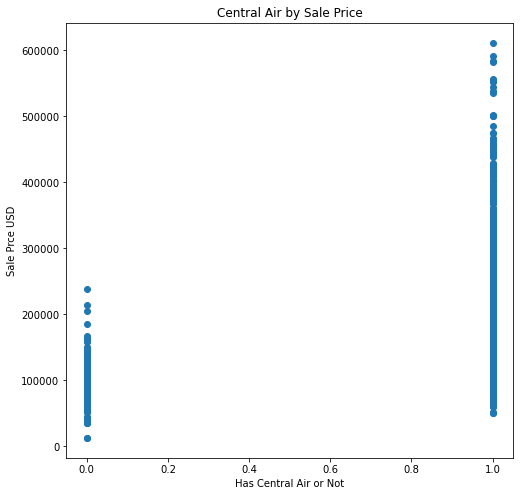

In [67]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(train['central_air'], train['saleprice'])
plt.title('Central Air by Sale Price')
plt.xlabel('Has Central Air or Not')
plt.ylabel('Sale Prce USD')
plt.savefig('../images/central_air');

In [39]:
train.corr()['saleprice'].sort_values(ascending=False).head(20)

saleprice         1.000000
overall_qual      0.803420
gr_liv_area       0.719370
total_bsmt_sf     0.665333
garage_area       0.655493
garage_cars       0.648663
1st_flr_sf        0.648360
year_built        0.572652
year_remod_add    0.550704
full_bath         0.538092
garage_yr_blt     0.534928
mas_vnr_area      0.511598
totrms_abvgrd     0.509572
fireplaces        0.473658
bsmtfin_sf_1      0.445755
lot_frontage      0.346016
open_porch_sf     0.338903
wood_deck_sf      0.327990
lot_area          0.303320
bsmt_full_bath    0.284477
Name: saleprice, dtype: float64

In [40]:
train['saleprice'].corr(train['central_air'])

0.2773679130508617

In [41]:
mlr = LinearRegression()

X = train[['gr_liv_area', 'overall_qual', 'garage_area', 'total_bsmt_sf', 'year_built', 'year_remod_add', 'mas_vnr_area', 'fireplaces',  'bsmtfin_sf_1', 'central_air']]
y = train['saleprice']

X_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 6)

In [42]:
mlr.fit(X_train, y_train)

mlr.score(X_train, y_train), mlr.score(x_test, y_test)

(0.8525588348993913, 0.8592689236134621)

In [43]:
mlr.coef_

array([    51.3475914 ,  16599.27724596,     41.51806939,     25.23426342,
          177.78596971,    406.41180092,     44.30039738,   6964.29997314,
           25.4391674 , -10102.01362786])

In [44]:
train_clean = train
test_clean = test

In [45]:
train_clean.to_csv('../datasets/train_clean.csv', index = False)
test_clean.to_csv('../datasets/test_clean.csv', index = False)

## Categorical Data

##### Will preprocess in next notebook.
- Paved Driveway
- Neighborhood